In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils.utils import load_cifar10_data, create_cnn_model, generate_pseudo_labels

In [4]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = load_cifar10_data()

# Ensure correct data types
x_train = x_train.astype(np.float32)
y_train = np.array(y_train).astype(np.int32)
x_test = x_test.astype(np.float32)
y_test = np.array(y_test).astype(np.int32)

# Verify shapes
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3), y_train shape: (50000,)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000,)


In [5]:
# Define model
model = create_cnn_model()

# Train model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_initial = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3550 - loss: 1.7418 - val_accuracy: 0.5489 - val_loss: 1.2791
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5869 - loss: 1.1747 - val_accuracy: 0.6078 - val_loss: 1.1005
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6513 - loss: 0.9916 - val_accuracy: 0.6635 - val_loss: 0.9598
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6913 - loss: 0.8917 - val_accuracy: 0.6848 - val_loss: 0.9090
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7171 - loss: 0.8003 - val_accuracy: 0.6836 - val_loss: 0.9345
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7381 - loss: 0.7465 - val_accuracy: 0.7084 - val_loss: 0.8574
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7590 - loss: 0.6837 - val_accuracy: 0.6929 - val_loss: 0.9147
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7770 - l

In [6]:
# Generate pseudo labels
unlabeld_data = x_test[:5000]
pseudo_labels = generate_pseudo_labels(model, unlabeld_data)

# Combine labeled and pseudo labeled data
combined_x = np.concatenate((x_train, unlabeld_data))
combined_y = np.concatenate((y_train, pseudo_labels))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━

In [7]:
# Train with combined data
model = create_cnn_model()
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_combined = model.fit(combined_x, combined_y, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3673 - loss: 1.7159 - val_accuracy: 0.5444 - val_loss: 1.2753
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.5970 - loss: 1.1412 - val_accuracy: 0.6366 - val_loss: 1.0528
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6533 - loss: 0.9793 - val_accuracy: 0.6734 - val_loss: 0.9437
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6944 - loss: 0.8723 - val_accuracy: 0.6903 - val_loss: 0.9083
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7170 - loss: 0.8087 - val_accuracy: 0.6953 - val_loss: 0.8746
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7423 - loss: 0.7318 - val_accuracy: 0.6933 - val_loss: 0.9217
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7563 - loss: 0.6935 - val_accuracy: 0.7103 - val_loss: 0.8549
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7721 -

In [8]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 1s - 4ms/step - accuracy: 0.7132 - loss: 0.9095
Test accuracy: 71.32%


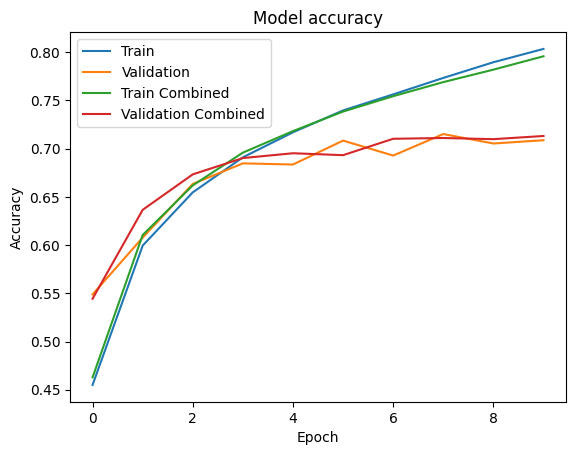

In [12]:
# Plot training and validation accuracy
plt.plot(history_initial.history['accuracy'])
plt.plot(history_initial.history['val_accuracy'])
plt.plot(history_combined.history['accuracy'])
plt.plot(history_combined.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train Combined', 'Validation Combined'], loc='upper left')
plt.show()

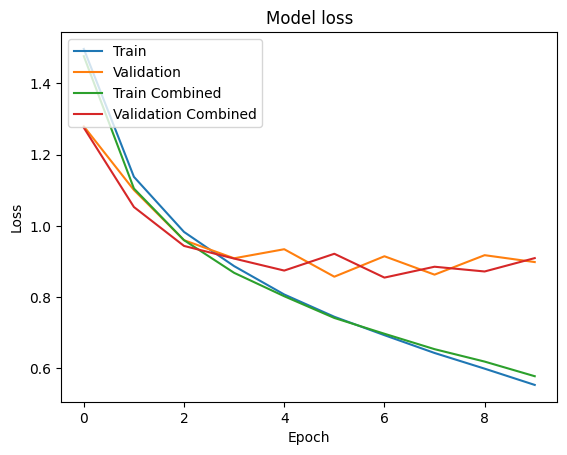

In [13]:
plt.plot(history_initial.history['loss'])
plt.plot(history_initial.history['val_loss'])
plt.plot(history_combined.history['loss'])
plt.plot(history_combined.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train Combined', 'Validation Combined'], loc='upper left')
plt.show()